In [1]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [205]:
time <- as.integer(50)

In [323]:
N_AGENTS <- 1134

In [324]:
N_AGENTS <- 12625

In [325]:
mypath <- "../../log/EmailURV-oldnews"

In [326]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [327]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [328]:
list.dirs(mypath)

[1] "2019_10_03_21_36_14" "2019_10_03_21_36_16" "2019_10_03_21_36_34"
[4] "2019_10_03_21_36_36" "2019_10_03_21_36_55" "2019_10_03_21_36_58"
[7] "2019_10_03_21_37_16" "2019_10_03_21_37_18"

In [329]:
thepath = list.dirs(mypath)[1]

In [330]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [331]:
DF <- read.csv(file = filename, skip=12)

In [332]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [333]:
tempDF

,time,agent,k.core,state,degree
1053,1,1052,1,i,1


In [334]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [335]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [336]:
DT <- data.table(DF)

In [337]:
DT1 = DT[, sum(density), by=list(time, state)]

In [338]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [339]:
DT1$density <- DT1$density / N_AGENTS

In [340]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [341]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 100]
density <- as.numeric(tempDT1[,'density'])

In [342]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [358]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 100]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

[1] "../../log/EmailURV-oldnews/2019_10_03_21_36_14/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_36_16/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_36_34/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_36_36/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_36_55/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_36_58/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_37_16/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_37_18/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_37_38/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_37_40/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_38_00/k_core.csv"
[1] "../../log/EmailURV-oldnews/2019_10_03_21_38_01/k_core.csv"


In [359]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [360]:
emptytable <- rawtable

In [361]:
emptytabletime <- emptytable[emptytable$time == 100]
#emptytabletime$density <- emptytabletime$density + 1e-3
#emptytabletime <- emptytabletime[emptytabletime$density < 0.21]
#emptytabletime <- emptytabletime[emptytabletime$density > 0.01]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + emptytabletime$k.core.init %% 2
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 100][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 100][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [362]:
toplot[is.na(toplot)] <- 1e-4

In [363]:
toplot = toplot[order(toplot$k.core.init),]

In [364]:
typeof(toplot)

[1] "list"

In [365]:
save(toplot,file=paste(mypath, "/", "toplot.Rda", sep=""))

In [366]:
load(paste(mypath, "/", "toplot.Rda", sep=""))

In [367]:
toplot

k.core.init,mean,std
1,0.000158415841584,0.00010000000000
2,0.041821782178218,0.00010000000000
3,0.039841584158416,0.00010000000000
4,0.041346534653465,0.00010000000000
5,0.033504950495050,0.00010000000000
6,0.038297029702970,0.00173626219539
7,0.038257425742574,0.00010000000000
8,0.000158415841584,0.00010000000000
9,0.038019801980198,0.00010000000000
10,0.038891089108911,0.00010000000000


Plot

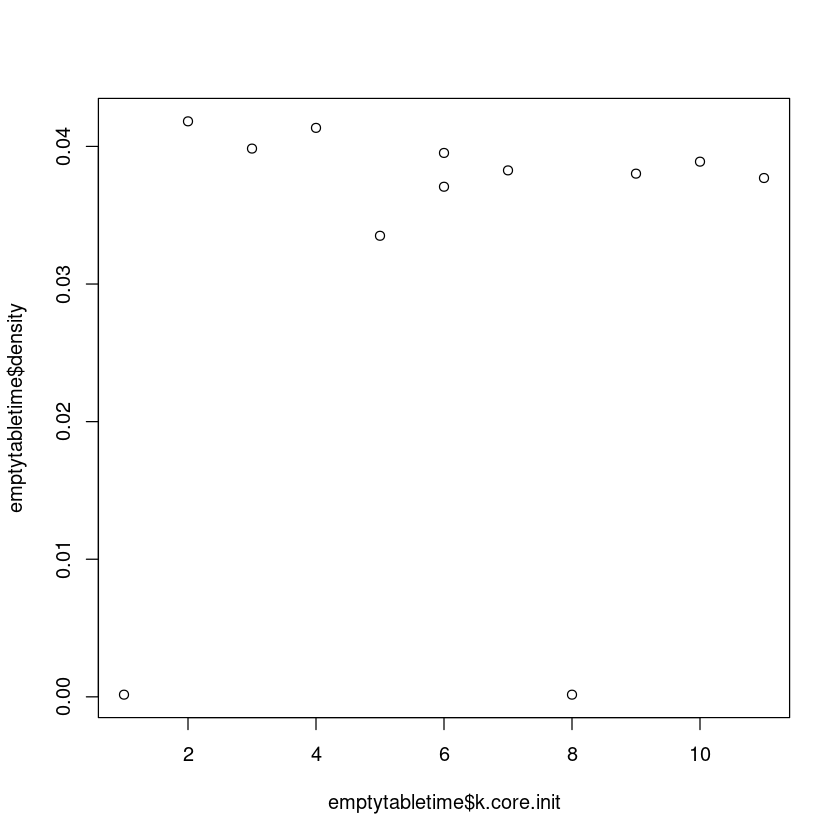

In [368]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [369]:
f <- function(x,a,b) {a * exp(b * x)} 



Call:
lm(formula = y ~ x)

Residuals:
           Min             1Q         Median             3Q            Max 
-0.03316723672  0.00227830783  0.00387614761  0.00869990999  0.01356399640 

Coefficients:
                  Estimate     Std. Error t value Pr(>|t|)
(Intercept) 0.026568496850 0.010539106602 2.52094 0.032718
x           0.000844644464 0.001553906493 0.54356 0.599946

Residual standard error: 0.0162975088 on 9 degrees of freedom
Multiple R-squared:  0.0317853684,	Adjusted R-squared:  -0.0757940351 
F-statistic: 0.295459608 on 1 and 9 DF,  p-value: 0.599946036


[1] 0.178284515281


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
           Min             1Q         Median             3Q            Max 
-0.03528978744  0.00106099841  0.00349574650  0.00821333518  0.01568654712 

Coefficients:
                  Estimate     Std. Error  t value   Pr(>|t|)
(Intercept)  0.03163636364  0.00509356177  6.21105 0.00025633
poly(x, 2)1  0.00885870588  0.01689343323  0.52439 0.61422420
poly(x, 2)2 -0.01036216420  0.01689343323 -0.61338 0.55665567

Residual standard error: 0.0168934332 on 8 degrees of freedom
Multiple R-squared:  0.0752751897,	Adjusted R-squared:  -0.155906013 
F-statistic: 0.325611204 on 2 and 8 DF,  p-value: 0.73122333


[1] 0.27436324405

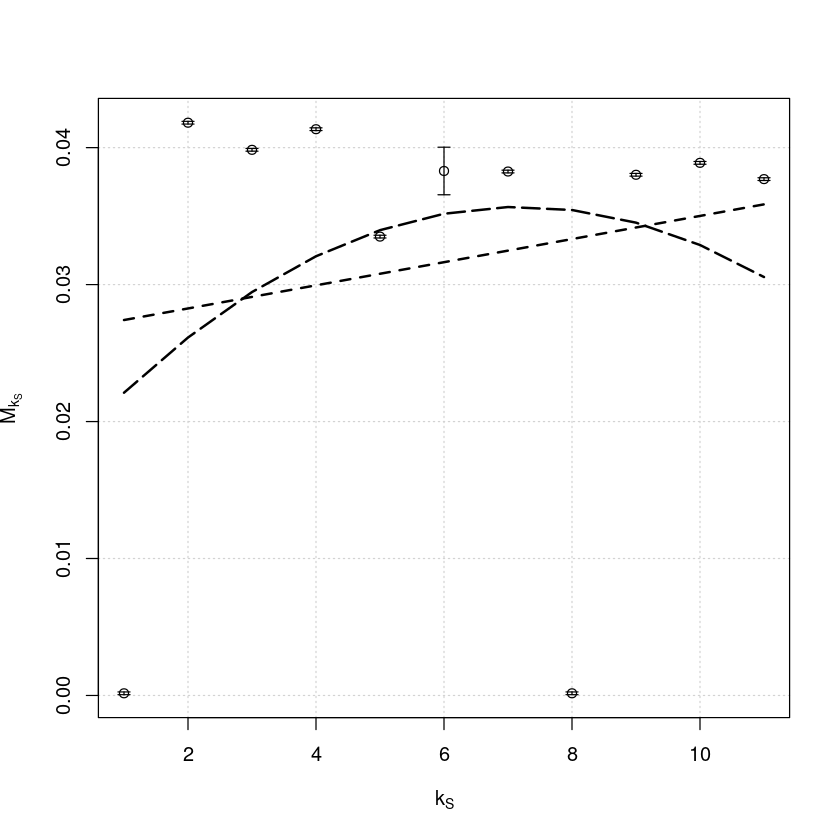

In [370]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)



Formula: y ~ a * x/(b + x)

Parameters:
      Estimate   Std. Error t value  Pr(>|t|)
a 0.0387782384 0.0107843917 3.59577 0.0057864
b 0.9121141748 1.4547629731 0.62698 0.5462433

Residual standard error: 0.0152540141 on 9 degrees of freedom

Number of iterations to convergence: 24 
Achieved convergence tolerance: 7.48579471e-06


[1] 0.402672265358


Formula: y ~ 1 - exp(-(1 + b) * x)

Parameters:
         Estimate      Std. Error     t value   Pr(>|t|)
b -0.995590333137  0.000928203354 -1072.59937 < 2.22e-16

Residual standard error: 0.0201035818 on 10 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 7.5877752e-07


[1] 0.179580670745

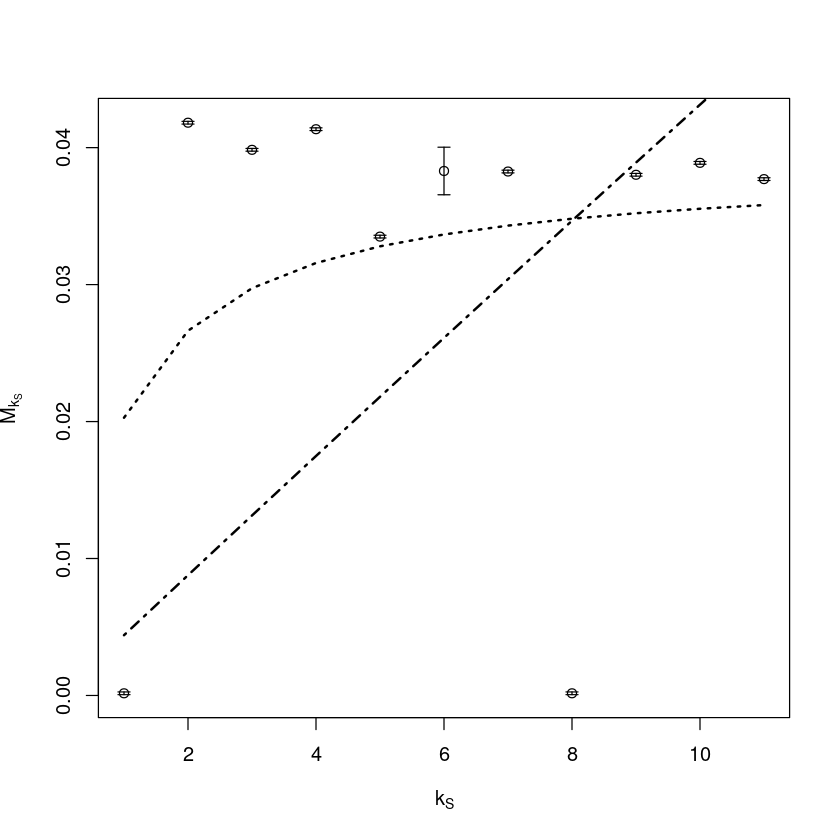

In [371]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)

# hyperbolic
m<-nls(y~a*x/(b+x), start=c(a=1,b=1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=3,col="black",lwd=2)

# exponential
m<-nls(y~1 - exp(-(1+b)*x), start=list(b=0.1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=4,col="black",lwd=2)

In [372]:
pdf('mksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()


png 
  2

Log y plot

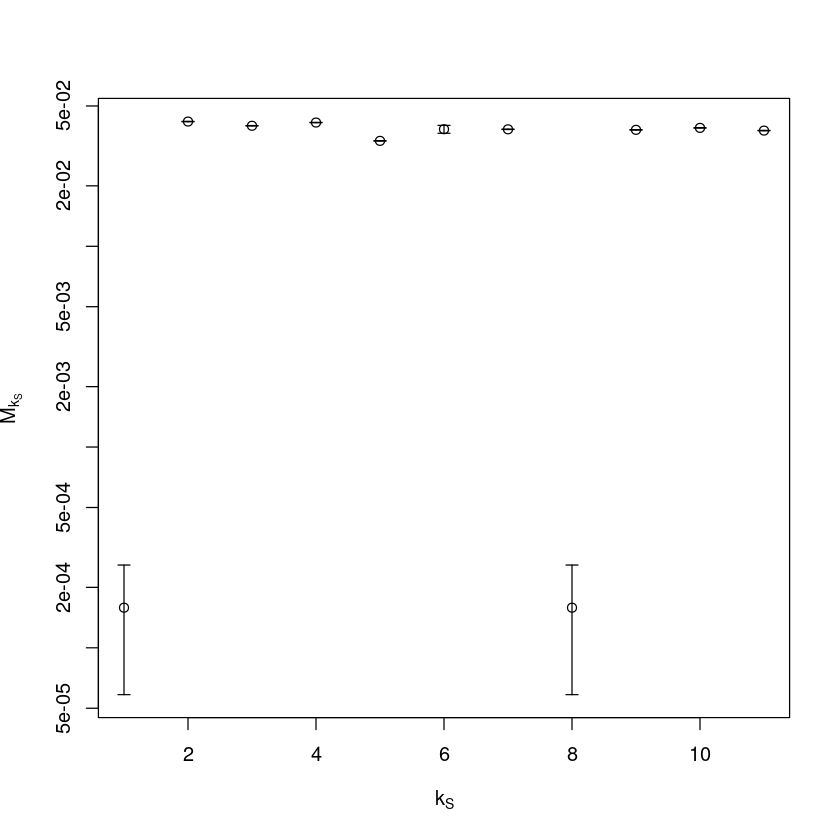

In [373]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


In [374]:
pdf('logmksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()

png 
  2